In [120]:
# importowanie niezbędnych pakietów 
import patsy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import model_selection
from sklearn import datasets, linear_model

# odczyt dancyh przez funckcji describe() i head()
df=pd.read_csv("D:\\Education\\3 rok AGH\\5 Semestr\\AiBD\\pandas_project\\laboratorium-lin-model-Matyiashchyk\\SCORES.csv")
print(df.describe(include='all'))


           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


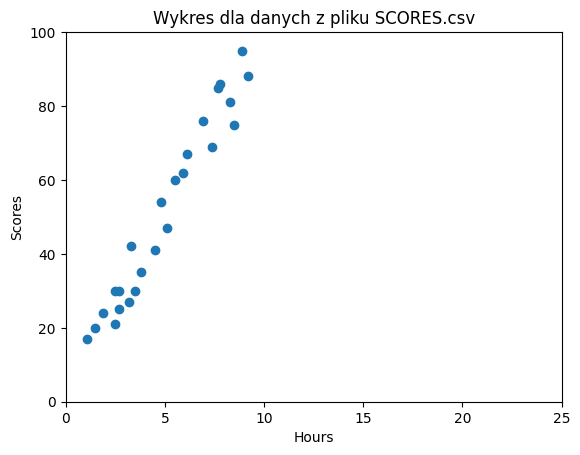

In [121]:
#Tworzenie wykresu typu scatter 

Hours = df["Hours"]
Scores = df["Scores"]
plt.scatter(Hours, Scores)
plt.xlim(0, 25)
plt.ylim(0, 100)
plt.xlabel('Hours') 
plt.ylabel('Scores') 
plt.title('Wykres dla danych z pliku SCORES.csv')
plt.show()

In [122]:
# Podział danych na treningowe(30%) i testowe. 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
# Podział na niezależne (X) i zależne (y) zmienne
X = df.iloc[:, :-1].values 
y = df.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)
regressor = LinearRegression() 
regressor.fit(X_train, y_train)
#wartość punktu przecięcia i nachylenia obliczona przez algorytm regresji liniowej dla naszego zestawu danych. 
print(regressor.intercept_)
#Wskaznik uchylenia prostej(współczynnik X). Oznacza to, że na każdą jednostkę zmiany w badanych godzinach zmiana wyniku wynosi około 9,84%
print(regressor.coef_)




1.0979263522987353
[9.8479817]


In [123]:
y_pred = regressor.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df1)



    Actual  Predicted
0       20  15.869899
1       27  32.611468
2       69  73.972991
3       30  25.717881
4       62  59.201018
5       35  38.520257
6       24  19.809092
7       86  77.912184
8       76  69.049000
9       17  11.930706
10      47  51.322633
11      85  76.927385
12      42  33.596266
13      81  82.836174
14      88  91.699358
15      67  61.170615
16      30  35.565862
17      25  27.687477


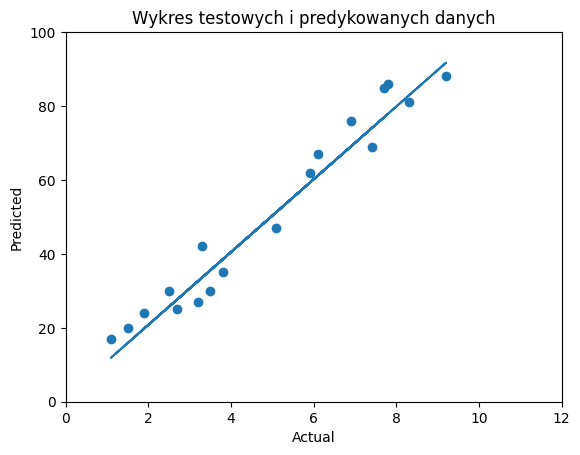

In [124]:

# Twoerzenie wykresu konfrantającego.
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.xlim(0, 12)
plt.ylim(0, 100)
plt.xlabel('Actual') 
plt.ylabel('Predicted') 
plt.title('Wykres testowych i predykowanych danych')
plt.show()



In [125]:
# Walidacja danych. 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 5.0017874859583955
Mean Squared Error: 28.474750355381598
Root Mean Squared Error: 5.336173756108547


             Age         SBP
count  19.000000   19.000000
mean   64.947368  129.421053
std     7.214751   13.454928
min    54.000000  111.000000
25%    60.500000  119.000000
50%    63.000000  129.000000
75%    68.500000  137.000000
max    79.000000  163.000000
(19, 2)
    Age  SBP
0    60  117
1    61  120
2    74  145
3    57  129
4    63  132
5    68  130
6    66  127
7    77  163
8    63  136
9    54  115
10   63  118
11   76  132
12   60  111
13   61  112
14   65  147
15   79  138
16   69  141
17   56  124
18   62  122


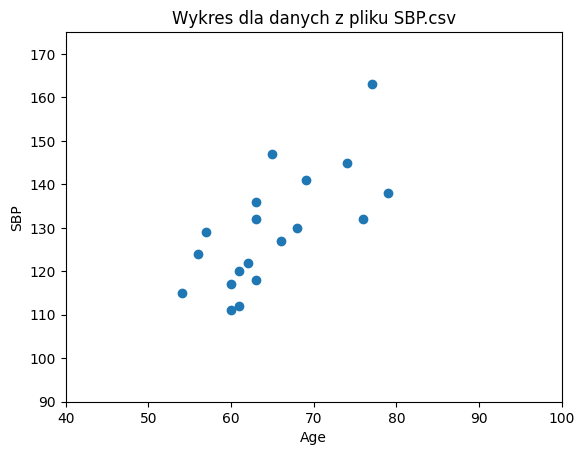

72.71509971509974
[0.79344729]
    Rzeczywiste  Predykowane
0           118   122.702279
1           120   121.115385
2           136   122.702279
3           122   121.908832
4           147   124.289174
5           141   127.462963
6           127   125.082621
7           132   122.702279
8           145   131.430199
9           130   126.669516
10          112   121.115385
11          115   115.561254
12          163   133.810541
13          124   117.148148


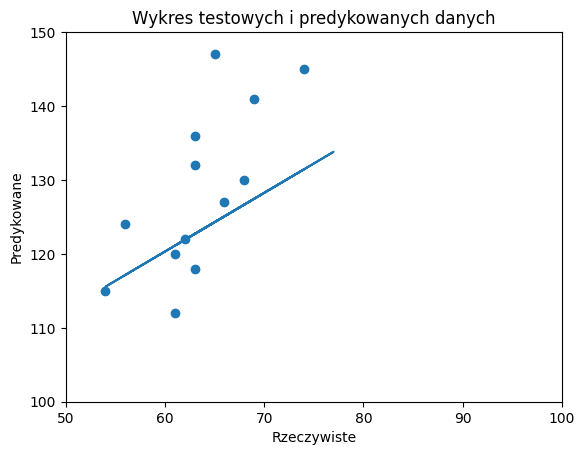

Mean Absolute Error: 9.234839234839237
Mean Squared Error: 154.7828131033259
Root Mean Squared Error: 12.441174104694698


In [126]:
#Ten sam skrypt tylko dla pliku SBP.csv
df3=pd.read_csv("D:\\Education\\3 rok AGH\\5 Semestr\\AiBD\\pandas_project\\laboratorium-lin-model-Matyiashchyk\\SBP.csv")
print(df3.describe(include='all'))
print(df3.shape)
print(df3)
#################################
Age = df3["Age"]
SBP = df3["SBP"]
plt.scatter(Age, SBP)
plt.xlim(40,100)
plt.ylim(90, 175)
plt.xlabel('Age') 
plt.ylabel('SBP') 
plt.title('Wykres dla danych z pliku SBP.csv')
plt.show()
#################################
# Podział danych na treningowe(30%) i testowe. 
X_Wiek = df3.iloc[:, :-1].values 
y_SBP = df3.iloc[:, 1].values
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_Wiek, y_SBP, test_size=0.7, random_state=0)
regressor = LinearRegression() 
regressor.fit(X_train1, y_train1)

#wartość punktu przecięcia i nachylenia obliczona przez algorytm regresji liniowej dla naszego zestawu danych. 
print(regressor.intercept_)
#Wskaznik uchylenia prostej(współczynnik X). Oznacza to, że na każdą jednostkę zmiany w badanych godzinach zmiana wyniku wynosi około 9,84%
print(regressor.coef_)
###################################
y_pred1 = regressor.predict(X_test1)
df4 = pd.DataFrame({'Rzeczywiste': y_test1, 'Predykowane': y_pred1})
print(df4)

# Twoerzenie wykresu konfrantającego.
plt.scatter(X_test1, y_test1)
plt.plot(X_test1, y_pred1)
plt.xlim(50, 100)
plt.ylim(100, 150)
plt.xlabel('Rzeczywiste') 
plt.ylabel('Predykowane') 
plt.title('Wykres testowych i predykowanych danych')
plt.show()

# Walidacja danych. 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred1)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred1)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))
